<a href="https://colab.research.google.com/github/amitabhswain/Predicting_Employee_AttritionRate/blob/master/Employee(HE)_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Loading datasets 
train=pd.read_csv('/content/drive/My Drive/Employees_leaving(hkereart)/Dataset/Train.csv')
test= pd.read_csv('/content/drive/My Drive/Employees_leaving(hkereart)/Dataset/Test.csv')
sample_submission= pd.read_csv('/content/drive/My Drive/Employees_leaving(hkereart)/Dataset/sample_submission.csv')


 mu = 0.19 and sigma = 0.19



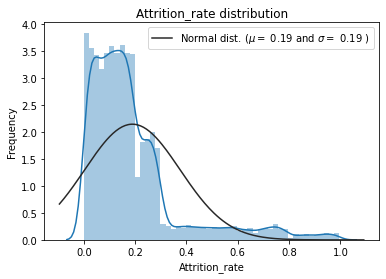

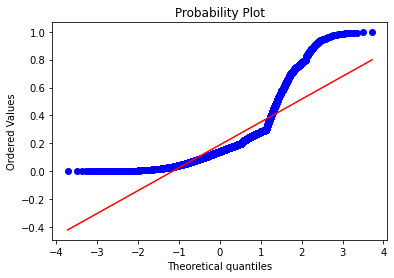

In [5]:
# Plotting distribution graph of the datasets
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition_rate distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()

# Normalising the distribution of the skewed dataset



 mu = 0.16 and sigma = 0.14



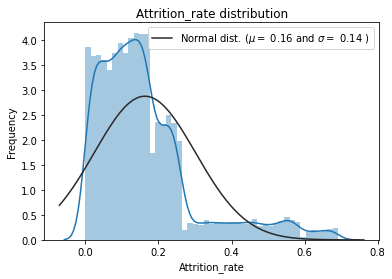

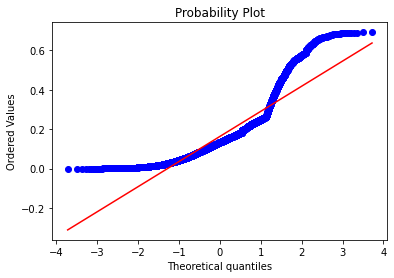

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train['Attrition_rate'] = np.log1p(train['Attrition_rate'])

#Check the new distribution 
sns.distplot(train['Attrition_rate'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Attrition_rate distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Attrition_rate'], plot=plt)
plt.show()

# Analysing the datasets

In [7]:
train.shape


(7000, 24)

In [8]:
test.shape


(3000, 23)

In [9]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.168983
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.064851
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.081672
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.064664
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.167800


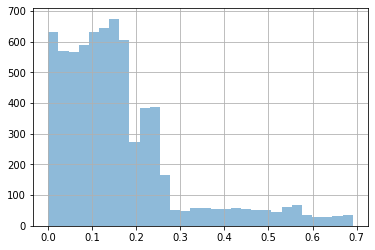

In [10]:

# Plot a histogram
train.Attrition_rate.hist(bins=30, alpha=0.5)
plt.show()

In [11]:
test.columns.to_list()

['Employee_ID',
 'Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7']

In [12]:
sample_submission.head()

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


In [13]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.163060
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.138615
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.068032
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.133350
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.211071
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.691095


# Handling missing values of the training set

In [14]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='median')
train[['Age','Time_of_service','Work_Life_balance','VAR2']] = mean_imputer.fit_transform(train[['Age','Time_of_service','Work_Life_balance','VAR2']])

median_imputer = SimpleImputer(strategy='most_frequent')
train[['Pay_Scale','VAR4']] = median_imputer.fit_transform(train[['Pay_Scale','VAR4']])

In [ ]:
train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [ ]:
train.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.200357,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.057112,1.121904,0.836377,0.948171,0.986933,0.503983,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,1.891078,2.000000,6.000000,3.000000,0.070400
50%,39.622799,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.008126,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


# Finding relationships between the feature columns

In [ ]:
train.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [ ]:
# print all of their datatypes and their unique values
for column in train.columns:
  if train[column].dtype==object:
    print(str(column)+':'+str(train[column].unique()))
    print(train[column].value_counts())
    print('-------------------------')

Employee_ID:['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
EID_2122     1
EID_21148    1
EID_25114    1
EID_11534    1
EID_18384    1
            ..
EID_4439     1
EID_10906    1
EID_7491     1
EID_24827    1
EID_23502    1
Name: Employee_ID, Length: 7000, dtype: int64
-------------------------
Gender:['F' 'M']
F    4114
M    2886
Name: Gender, dtype: int64
-------------------------
Relationship_Status:['Married' 'Single']
Married    4520
Single     2480
Name: Relationship_Status, dtype: int64
-------------------------
Hometown:['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64
-------------------------
Unit:['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']
IT                           1394
Logistics               

In [ ]:
train.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005599,0.883423,0.141393,0.001230,0.011897,0.002367,0.012578,0.002985,0.005534,0.005023,0.007356,0.001664,0.000014,-0.000809,0.008476,-0.015086
Education_Level,-0.005599,1.000000,-0.012657,-0.002077,0.002991,-0.017690,0.009986,0.006830,-0.015241,-0.002185,-0.009894,-0.009689,0.004283,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.883423,-0.012657,1.000000,0.135671,-0.003452,0.004791,-0.002261,0.020085,-0.002527,0.004715,0.003659,0.006804,-0.005679,0.003158,0.007542,0.006972,-0.016213
Time_since_promotion,0.141393,-0.002077,0.135671,1.000000,0.014147,-0.012061,-0.008851,-0.008896,-0.007418,-0.002873,0.004022,-0.002783,-0.003549,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001230,0.002991,-0.003452,0.014147,1.000000,0.008460,-0.006887,-0.004143,-0.018306,0.001351,0.010437,0.010991,0.020272,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.011897,-0.017690,0.004791,-0.012061,0.008460,1.000000,0.021299,-0.011681,0.004129,0.023898,0.008002,-0.009019,-0.005639,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.002367,0.009986,-0.002261,-0.008851,-0.006887,0.021299,1.000000,0.022376,-0.014460,-0.008458,-0.006750,0.010387,-0.012172,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012578,0.006830,0.020085,-0.008896,-0.004143,-0.011681,0.022376,1.000000,-0.022704,0.011346,0.006035,0.003378,-0.009742,0.018070,-0.012315,0.002379,-0.015221
Work_Life_balance,0.002985,-0.015241,-0.002527,-0.007418,-0.018306,0.004129,-0.014460,-0.022704,1.000000,-0.022025,-0.001423,0.004473,-0.025473,0.022178,0.003869,0.024506,0.020738
VAR1,0.005534,-0.002185,0.004715,-0.002873,0.001351,0.023898,-0.008458,0.011346,-0.022025,1.000000,0.002181,-0.003318,0.002009,0.007904,-0.002771,0.009355,-0.008073


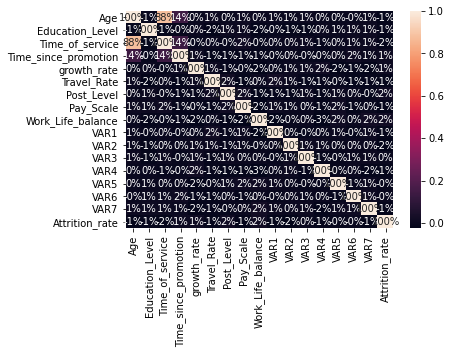

In [ ]:
sns.heatmap(train.corr(),annot=True,fmt='.0%')

In [ ]:
#Transform the data
# Transform non-numerical cols into numerical
from sklearn.preprocessing import LabelEncoder
for column in test.columns:
  if test[column].dtype==np.number:
    continue
  test[column]=LabelEncoder().fit_transform(test[column])  

In [ ]:
train.head(8)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.000000,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3
1,EID_18000,M,24.000000,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3
2,EID_3891,F,58.000000,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3
3,EID_17492,F,26.000000,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,1.891078,3,7,3
4,EID_22534,F,31.000000,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2
5,EID_2278,M,54.000000,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,21,2,5,9.0,type2,1.0,3,-1.8176,1.8688,2.000000,2,8,3
6,EID_18588,F,21.000000,4,Married,Springfield,Purchasing,Directive,2.0,1,50,1,1,6.0,type2,2.0,3,-0.9612,0.7075,2.000000,3,7,3
7,EID_1235,F,39.622799,3,Married,Springfield,Sales,Directive,34.0,4,23,1,4,6.0,type3,2.0,3,-0.1048,-0.4537,2.000000,3,9,3


# Dropping the feature label from training set

In [ ]:
train.to_csv("train_labels.csv",columns=train[['Attrition_rate']],index=False)
label=pd.read_csv('train_labels.csv')
label.head(6)
train=train.drop(columns=train[['Attrition_rate']],axis=1)



In [ ]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,1.891078,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2




# Training the models on datasets



In [ ]:
# Importing regression models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error




In [ ]:
from sklearn.linear_model import Lasso,  BayesianRidge, LinearRegression, Ridge
features=['Time_of_service','Time_since_promotion','growth_rate','Post_Level','Pay_Scale','Work_Life_balance','VAR2','VAR7']


In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (train[features], label, test_size = 0.20, random_state=42)

In [ ]:
# Evaluating the perfomance of regression models
models = []

models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('LR', LinearRegression()))
models.append(('BR', BayesianRidge()))



# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train,  cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RIDGE: -0.019247 (0.001184)
LASSO: -0.019207 (0.001215)
LR: -0.019247 (0.001184)
BR: -0.019222 (0.001205)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Lasso Regression

In [ ]:

from sklearn.model_selection import GridSearchCV
lasso= Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor= GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(train[features],label)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-0.019203433776628746


In [ ]:
from sklearn.metrics import mean_squared_error
lasso= Lasso(alpha=1e-15)
lasso.fit(X=train[features],y=label)


Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Ridge

In [ ]:

from sklearn.model_selection import GridSearchCV
ridge= Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor= GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(train[features],label)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.01920338433222546


In [ ]:
from sklearn.metrics import mean_squared_error
ridge= Ridge(alpha=20)
ridge.fit(X=train[features],y=label)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

# ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
en= ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
en_regressor= GridSearchCV(en,parameters,scoring='neg_mean_squared_error',cv=5)
en_regressor.fit(train[features],label)
print(en_regressor.best_params_)
print(en_regressor.best_score_)

{'alpha': 1e-15}
-0.019205441911944968


In [ ]:
from sklearn.metrics import mean_squared_error
en= ElasticNet(alpha=1e-15)
en.fit(X=train[features],y=label)


ElasticNet(alpha=1e-15, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Make predictions on the test data
test['Attrition_rate'] = en.predict(test[features])
# Prepare a submission file
submission_1 = test[['Employee_ID','Attrition_rate']]
# Save the submission file as .csv
submission_1.to_csv('ElasticNet_2.csv', index=False)

# Handling missing values of test data

In [ ]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='median')
test[['Age','Time_of_service','Work_Life_balance','VAR2']] = mean_imputer.fit_transform(test[['Age','Time_of_service','Work_Life_balance','VAR2']])

median_imputer = SimpleImputer(strategy='most_frequent')
test[['Pay_Scale','VAR4']] = median_imputer.fit_transform(test[['Pay_Scale','VAR4']])

In [ ]:
test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [ ]:
#Transform the data
# Transform non-numerical cols into numerical
from sklearn.preprocessing import LabelEncoder
for column in test.columns:
  if test[column].dtype==np.number:
    continue
  test[column]=LabelEncoder().fit_transform(test[column])  

In [ ]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1702,0,32.0,4,1,3,9,2,7.0,4,10,1,4,4.0,2,1.0,2,-0.9612,-0.4537,2.0,0,3,3
1,2958,1,65.0,1,1,2,2,3,41.0,2,52,1,0,1.0,2,1.0,3,-0.9612,0.7075,1.0,1,3,1
2,1628,1,52.0,2,0,3,10,3,21.0,3,5,0,0,8.0,3,1.0,3,-0.1048,0.7075,2.0,0,4,2
3,2709,1,50.0,4,1,4,4,0,11.0,4,8,1,0,2.0,0,4.0,2,-0.1048,0.7075,2.0,1,3,2
4,2580,0,44.0,2,0,1,9,2,12.0,4,27,1,2,2.0,2,4.0,3,1.6081,0.7075,2.0,1,2,3


In [ ]:
features = ['Time_of_service','Time_since_promotion','growth_rate','Post_Level','Work_Life_balance','VAR2','VAR7']

In [ ]:
train.shape

(7000, 23)

In [ ]:
test.shape

(3000, 23)

In [ ]:
label

,Attrition_rate
0,0.168983
1,0.064851
2,0.081672
3,0.064664
4,0.167800
...,...
6995,0.578802
6996,0.100298
6997,0.579250
6998,0.347977


In [ ]:
test

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,1702,0,32.000000,4,1,3,9,2,7.0,4,10,1,4,4.0,2,1.0,2,-0.9612,-0.4537,2.000000,0,3,3,0.196620
1,2958,1,65.000000,1,1,2,2,3,41.0,2,52,1,0,1.0,2,1.0,3,-0.9612,0.7075,1.000000,1,3,1,0.189232
2,1628,1,52.000000,2,0,3,10,3,21.0,3,5,0,0,8.0,3,1.0,3,-0.1048,0.7075,2.000000,0,4,2,0.175701
3,2709,1,50.000000,4,1,4,4,0,11.0,4,8,1,0,2.0,0,4.0,2,-0.1048,0.7075,2.000000,1,3,2,0.194565
4,2580,0,44.000000,2,0,1,9,2,12.0,4,27,1,2,2.0,2,4.0,3,1.6081,0.7075,2.000000,1,2,3,0.190512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1677,0,32.000000,2,1,1,10,3,3.0,3,18,1,2,6.0,2,2.0,0,-0.1048,0.7075,1.000000,3,2,3,0.188270
2996,12,0,39.797816,1,1,1,4,2,10.0,2,37,1,3,9.0,2,1.0,2,0.7516,0.7075,3.000000,3,3,2,0.181197
2997,2656,0,60.000000,3,1,2,3,0,35.0,1,49,0,1,9.0,3,3.0,2,-1.8176,-0.4537,1.907476,3,3,3,0.186812
2998,2405,0,51.000000,0,0,3,2,1,23.0,1,10,0,1,6.0,3,1.0,4,0.7516,-0.4537,2.000000,2,4,1,0.180603


# Analysing the test data

In [ ]:
mean=0.189376
std=0.185753

In [ ]:
stay_df = train[train["Attrition_rate"] <0.5-std ]
stay_count = stay_df.count()
stay_count

Employee_ID                  6121
Gender                       6121
Age                          6121
Education_Level              6121
Relationship_Status          6121
Hometown                     6121
Unit                         6121
Decision_skill_possess       6121
Time_of_service              6121
Time_since_promotion         6121
growth_rate                  6121
Travel_Rate                  6121
Post_Level                   6121
Pay_Scale                    6113
Compensation_and_Benefits    6121
Work_Life_balance            6121
VAR1                         6121
VAR2                         6121
VAR3                         6121
VAR4                         6121
VAR5                         6121
VAR6                         6121
VAR7                         6121
Attrition_rate               6121
dtype: int64

In [ ]:
stay_df = train[train["Attrition_rate"] >0.5+std ]
stay_count = stay_df.count()
stay_count

Employee_ID                  305
Gender                       305
Age                          305
Education_Level              305
Relationship_Status          305
Hometown                     305
Unit                         305
Decision_skill_possess       305
Time_of_service              305
Time_since_promotion         305
growth_rate                  305
Travel_Rate                  305
Post_Level                   305
Pay_Scale                    304
Compensation_and_Benefits    305
Work_Life_balance            305
VAR1                         305
VAR2                         305
VAR3                         305
VAR4                         305
VAR5                         305
VAR6                         305
VAR7                         305
Attrition_rate               305
dtype: int64

In [ ]:
7000-779-107

6114

# BaseLine Model-1( Mean of all Attrition rates)


In [ ]:
test['Attrition_rate'] = np.mean(train.Attrition_rate)

In [ ]:
test[['Employee_ID','Attrition_rate']].to_csv('mean_sub.csv', index=False)

In [ ]:
bs_1=pd.read_csv('mean_sub.csv')

In [ ]:
bs_1.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.189376
1,EID_9658,0.189376
2,EID_22203,0.189376
3,EID_7652,0.189376
4,EID_6516,0.189376
